In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

In [3]:
# Preview the dataset
print(data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
# Select relevant features (Annual Income and Spending Score)
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values


In [5]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
labels = dbscan.fit_predict(X_scaled)

In [7]:
# Add the labels to the original data for visualization
data['Cluster'] = labels

C:\Users\dell\AppData\Local\Temp\ipykernel_10004\3111285532.py:3: UserWarning: The markers list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', style='Cluster', markers=["o", "X", "D", "s", "P"], s=100)


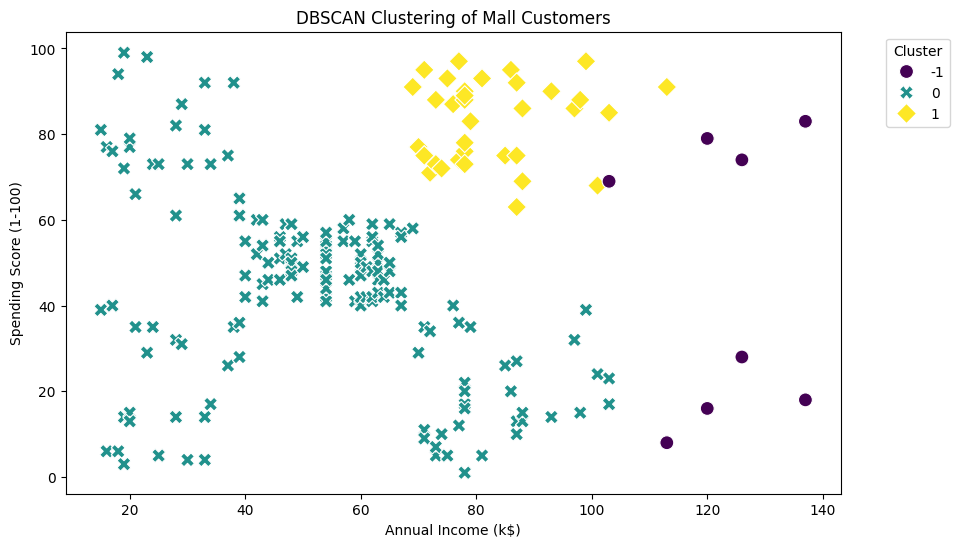

In [8]:
# Plot the results using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', style='Cluster', markers=["o", "X", "D", "s", "P"], s=100)
plt.title("DBSCAN Clustering of Mall Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()